In [1]:
import pandas as pd

file_path = 'customer_churn_dataset.csv'

customer_churn_data = pd.read_csv(file_path)

customer_churn_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
customer_churn_data.dropna(inplace=True)


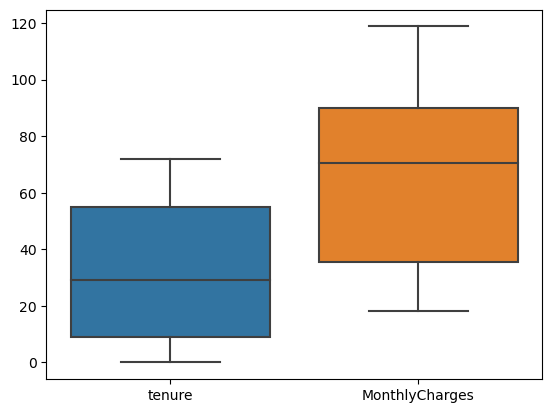

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=customer_churn_data[['tenure', 'MonthlyCharges']])
plt.show()


In [49]:
customer_churn_data['TotalCharges'] = pd.to_numeric(customer_churn_data['TotalCharges'], errors='coerce')


In [62]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaler
scaler = StandardScaler()
customer_churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(customer_churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [63]:
customer_churn_data.describe()


# Select only numeric columns
numeric_columns = customer_churn_data.select_dtypes(include=['number'])

grouped_data = customer_churn_data.groupby('Churn')[numeric_columns.columns].mean()

grouped_data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,0.211698,-0.116212,0.120022
Yes,0.254682,-0.586048,0.321712,-0.331554


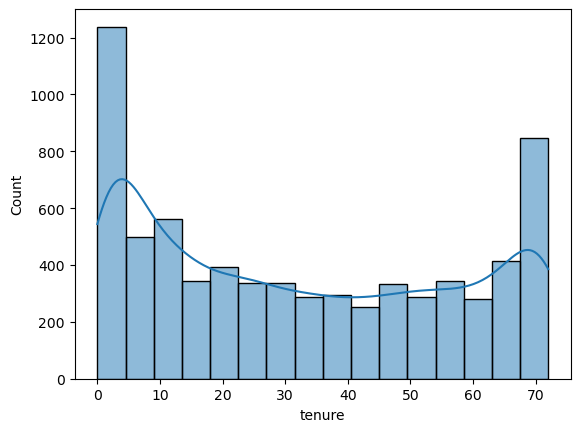

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for tenure
sns.histplot(customer_churn_data['tenure'], kde=True)
plt.show()


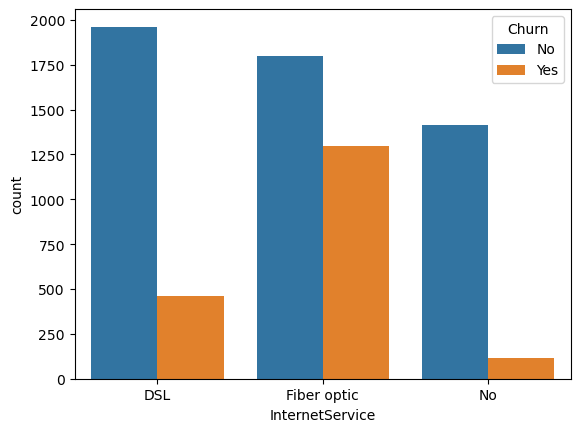

In [4]:
sns.countplot(x='InternetService', hue='Churn', data=customer_churn_data)
plt.show()


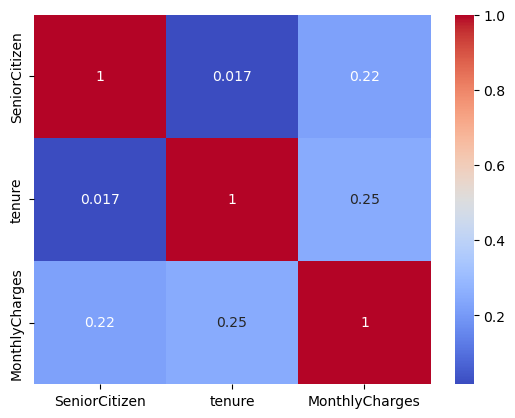

In [4]:
numeric_data = customer_churn_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix with only numeric data
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


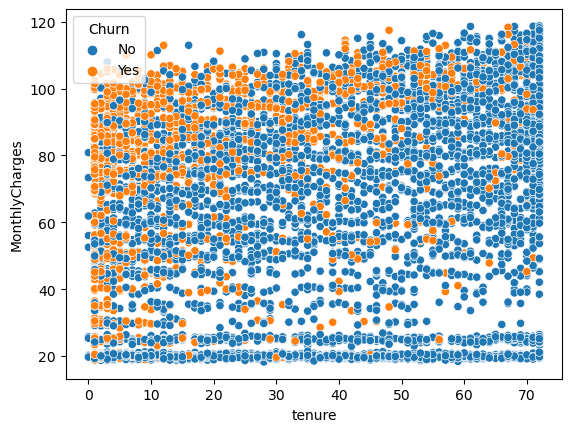

In [7]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=customer_churn_data)
plt.show()
